In [51]:
%matplotlib inline

with open( 'SnowDays.csv' ) as f:
    data = [ line[:-1].split(',') for line in f.readlines() ]
    
    X_text = [ row[:-1] for row in data ]
    Y_text = [ row[-1] for row in data ]
    
    snowkey = { 'Light': 0, 'Medium': 1, 'Heavy': 2 }
    tfkey = { 'TRUE': True, 'FALSE': False }
    X = [ [ snowkey[el] for el in row ] for row in X_text ]
    Y = [ tfkey[el] for el in Y_text ]
    
    featureNames = [ 'Previous morning', 'Previous day', 'Previous night', 'Early morning' ]


In [31]:
for row in data:
    print( '<tr>' + ''.join([ '<td>' + el + '</td>' for el in row ]) + '</tr>' )

<tr><td>Light</td><td>Light</td><td>Light</td><td>Heavy</td><td>TRUE</td></tr>
<tr><td>Light</td><td>Light</td><td>Heavy</td><td>Light</td><td>TRUE</td></tr>
<tr><td>Heavy</td><td>Heavy</td><td>Light</td><td>Light</td><td>FALSE</td></tr>
<tr><td>Heavy</td><td>Medium</td><td>Medium</td><td>Light</td><td>FALSE</td></tr>
<tr><td>Medium</td><td>Medium</td><td>Medium</td><td>Medium</td><td>TRUE</td></tr>
<tr><td>Light</td><td>Light</td><td>Heavy</td><td>Heavy</td><td>TRUE</td></tr>
<tr><td>Light</td><td>Heavy</td><td>Heavy</td><td>Medium</td><td>TRUE</td></tr>
<tr><td>Heavy</td><td>Medium</td><td>Medium</td><td>Light</td><td>FALSE</td></tr>
<tr><td>Medium</td><td>Medium</td><td>Light</td><td>Light</td><td>FALSE</td></tr>
<tr><td>Light</td><td>Light</td><td>Light</td><td>Light</td><td>FALSE</td></tr>
<tr><td>Light</td><td>Light</td><td>Medium</td><td>Light</td><td>FALSE</td></tr>
<tr><td>Light</td><td>Light</td><td>Light</td><td>Medium</td><td>TRUE</td></tr>


In [32]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=1)
clf = clf.fit(X, Y)

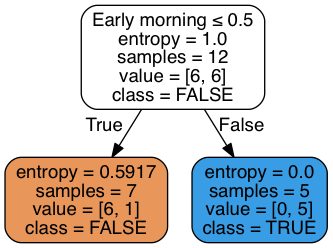

In [33]:

from sklearn.externals.six import StringIO  
import pydot 
from IPython.display import Image  
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=featureNames,  
                         class_names=tfkey.keys(),  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  


In [34]:
clf.predict(X)

array([ True, False, False, False,  True,  True,  True, False, False,
       False, False,  True], dtype=bool)

In [43]:
# Convert a list of true/false to 1/0
Y_num = [ 1 if el else 0 for el in Y ]
Y_num
X

[[0, 0, 0, 2],
 [0, 0, 2, 0],
 [2, 2, 0, 0],
 [2, 1, 1, 0],
 [1, 1, 1, 1],
 [0, 0, 2, 2],
 [0, 2, 2, 1],
 [2, 1, 1, 0],
 [1, 1, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1]]

In [44]:
# This regression runs on our full dataset

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, Y_num)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X) - Y_num) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X, Y_num))

# Plot outputs
#plt.scatter(X, Y_num,  color='black')
#plt.plot(X, regr.predict(X), color='blue',
#         linewidth=3)

#plt.xticks(())
#plt.yticks(())

#plt.show()

('Coefficients: \n', array([-0.18649558,  0.07225614,  0.15659649,  0.39815622]))
Residual sum of squares: 0.07
Variance score: 0.73


In [46]:
Y_predict = regr.predict(X)
Y_predict

array([ 1.0097172 ,  0.52659773, -0.01507412,  0.06926623,  0.65391803,
        1.32291018,  1.06926623,  0.06926623,  0.09916532,  0.21340476,
        0.37000125,  0.61156098])

In [54]:
# This regression runs on a subset

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, Y_num, test_size=.5,
                                                    random_state=0)

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X) - Y_num) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X, Y_num))

# Plot outputs
#plt.scatter(X, Y_num,  color='black')
#plt.plot(X, regr.predict(X), color='blue',
#         linewidth=3)

#plt.xticks(())
#plt.yticks(())

#plt.show()

y_predict_test = regr.predict(X_test)

('Coefficients: \n', array([-0.2 , -0.1 ,  0.25,  0.25]))
Residual sum of squares: 0.10
Variance score: 0.59


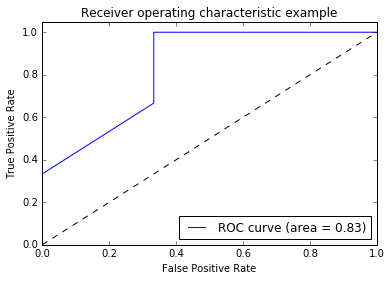

In [55]:
# ROC curve for our regression

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

fpr, tpr, _ = roc_curve(y_test, y_predict_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [56]:
y_predict_test

array([ 0.8 ,  0.5 ,  0.45,  0.5 , -0.35, -0.05])

In [57]:
y_test

[1, 1, 1, 0, 0, 0]

In [76]:
# Lets make a list of 1000 classes, and chop it into 10-folds
cv_classes = [ 0 for k in range(50) ] + [ 1 for k in range(50) ]
import random
random.shuffle( cv_classes )

def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in xrange(0, len(l), n):
        yield l[i:i+n]
        
folds = list( chunks( cv_classes, 25 ) )

fold_proportions = [ float(sum(fold))/len(fold) for fold in folds ]

fold_proportions



[0.56, 0.48, 0.36, 0.6]

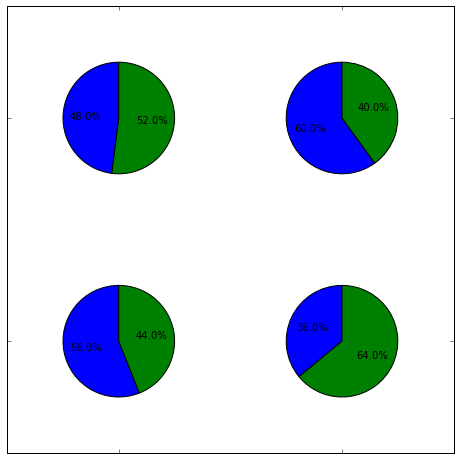

In [85]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
import numpy as np

for k in range(len(fold_proportions)):
    fp = fold_proportions[k]
    ax.pie([fp, (1-fp)], 
           autopct='%1.1f%%', startangle=90,
           radius=0.25, center=(k/2, k%2), frame=True)
    
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["", ""])
ax.set_yticklabels(["", ""])
ax.set_xlim((-0.5, 1.5))
ax.set_ylim((-0.5, 1.5))

# Set aspect ratio to be equal so that pie is drawn as a circle.
ax.set_aspect('equal')

plt.show()
